# Project 1: SAT & ACT Analysis


## Problem Statement

In this project I am comparing the data for the ACT and SAT standardized tests, looking at state averages over the years 2017 and 2018, with the goal of inspecting and making recommendations for the College Board, developers of the SAT, to increase their test's participation in future years.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [Data Import and Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.lines import Line2D

%matplotlib inline
sns.set_style("whitegrid")

# importing Line2D helped with making a custom legend in one of my figures.

## Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Importing all 4 data sets
sat_17 = pd.read_csv('../data/sat_2017.csv')
act_17 = pd.read_csv('../data/act_2017.csv')
sat_18 = pd.read_csv('../data/sat_2018.csv')
act_18 = pd.read_csv('../data/act_2018.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
# Displaying 10 rows

print("SAT 17")
print(sat_17.head(10))
print("SAT 18")
print(sat_18.head(10))
print("ACT 17")
print(act_17.head(10))
print("ACT 18")
print(act_18.head(10))

SAT 17
                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492  

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

The 4 data sets include similar formatting, including the participation rates and state-wide average scores for each test. Our columns are:


### SAT 2017 and SAT 2018
These two data sets have identical columns.

*State* - the state to which the row's data corresponds

*Participation* - rate of participation among high schoolers in that year's junior class who took the SAT

*Evidence-Based Reading and Writing* - State average score in the Reading and Writing portion of the exam, with 
possible scores from 200 to 800

*Math* - State average score in the Math portion of the exam, with possible scores from 200 to 800

*Total* - The sum of the previous two columns, with a score from 400 to 1600

### ACT 2017
*State* - the state to which the row's data corresponds

*Participation* - rate of participation among high schoolers in 2017's junior class who took the ACT

*English* - State average score for the English section of the test, between 1 and 36

*Math* - State average score for the Math section of the test, between 1 and 36

*Reading* - State average score for the Reading section of the test, between 1 and 36

*Science* - State average score for the Science section of the test, between 1 and 36

*Composite* - The average of all the subject test scores, also between 1 and 36

### ACT 2018
This year we only considered the composite score without the subject scores

*State* - the state to which the row's data corresponds

*Participation* - rate of participation among high schoolers in 2018's junior class who took the ACT

*Composite* - The average of all the subject test scores, also between 1 and 36


### Apologies in advance,
but the fastest way to look for obvious errors in a data set of this size is simply a visual scan:

In [4]:
sat_17

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


**Maryland's Math score was entered incorrectly. Their math score should be listed as [528](https://www.baltimoresun.com/news/maryland/education/bs-md-sat-scores-20170925-story.html), but since my own focus does not include subject scores, I chose to ignore this.**


In [5]:
sat_18

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [6]:
act_17

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


**Here Wyoming's Composite Score is entered incorrectly. Checking** ```np.mean([19.8,20.8,20.6,19.4])``` **gives us 20.2, which I DID correct in my own data.**

In [7]:
act_18

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,"Washington, D.C.",32%,23.6
9,Florida,66%,19.9


**Here the only issue is that ```National``` is at the end instead of the beginning, which I fix below. I'm not entirely sure I had to, but I did it just in case!**

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [8]:
# Since these columns aren't present in the 2018 data, we can drop them them in act_17
act_17 = act_17.drop(['English','Math','Reading','Science'],axis=1)

In [9]:
# I'll just move 'National' to the top of act_18 so it lines up with 'National' in act_17

target_row = 51
# Move target row to first element of list.
idx = [target_row] + [i for i in range(len(act_18)) if i != target_row]

# Re-order the dataframe by idx, reset the index so it makes sense, then drop the old index column
# (which apparently is kept after calling reset_index()... who knew?)
act_18 = act_18.iloc[idx].reset_index().drop(['index'],axis=1)
act_18.head()

,State,Participation,Composite
0,National,55%,20.8
1,Alabama,100%,19.1
2,Alaska,33%,20.8
3,Arizona,66%,19.2
4,Arkansas,100%,19.4


#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
print(sat_17.dtypes)
print(sat_18.dtypes)
print(act_17.dtypes)
print(act_18.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
State            object
Participation    object
Composite        object
dtype: object
State             object
Participation     object
Composite        float64
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Our participation rates are all in strings (to have the pretty xx% format), so those can be converted, and the composite score in ```act_17``` is messed up by Wyoming, as previously mentioned.**


#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
# make our participation rates floats
def part_float(df):
    df['Participation'] = df['Participation'].str.rstrip('%').astype('float') / 100.0
    
part_float(sat_17)
part_float(sat_18)
part_float(act_17)
part_float(act_18)

- Fix any individual values preventing other columns from being the appropriate type.

In [12]:
# Fixing that composite score for Wyoming and then ensuring all values are floats.
# This flashes a SettingWithCopyWarning, but everything works just fine so I'll ignore it.

act_17['Composite'][51] = '20.2'
act_17['Composite'] = [float(i) for i in act_17['Composite']]

/Users/brianb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


- Finish your data modifications by making sure the columns are now typed appropriately.

In [13]:
print('SAT 17')
print(sat_17.dtypes)
print('---')
print('SAT 18')
print(sat_18.dtypes)
print('---')
print("ACT 17")
print(act_17.dtypes)
print('---')
print("ACT 18")
print(act_18.dtypes)

SAT 17
State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object
---
SAT 18
State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object
---
ACT 17
State             object
Participation    float64
Composite        float64
dtype: object
---
ACT 18
State             object
Participation    float64
Composite        float64
dtype: object


## Reformatting the Data

In [14]:
# I started with adding National rows to the SAT dataframes so that they would line up exactly with the ACT
# data. Dropping the National rows from ACT would have been faster, but keeping them will give me those numbers
# that I can quickly reference for any sweeping statements I may want to make in my presentation!

# First I'll have to add in National scores to the SAT data:

national = pd.DataFrame(columns=['State','Participation','Evidence-Based Reading and Writing',
                         'Math','Total'])
national.loc[0] = ['National',np.nan,np.nan,np.nan,np.nan]
def set_avg(df):
    for i in df.columns[1:]:
        national[i][0] = np.mean(df[i])
        if i != 'Participation':
            national[i][0] = round(national[i][0])
        else:
            national[i][0] = round(national[i][0],2)
        
set_avg(sat_17)
sat_17 = sat_17.append(national)
set_avg(sat_18)
sat_18 = sat_18.append(national)

# Second, I'll move the 'National' entries to the top to line up with the ACT tables
# I can do that the same way as the act_18 movement above

target_row = 51

idx = [target_row] + [i for i in range(len(sat_17)) if i != target_row]
sat_17 = sat_17.iloc[idx].reset_index().drop(['index'],axis=1)

idx = [target_row] + [i for i in range(len(sat_18)) if i != target_row]
sat_18 = sat_18.iloc[idx].reset_index().drop(['index'],axis=1)

In [15]:
# In the midst of all that, my columns' data types all became 'object', so I had to do a simple float conversion

sat_17['Evidence-Based Reading and Writing']=sat_17['Evidence-Based Reading and Writing'].astype('float')
sat_17['Math']=sat_17['Math'].astype('float')
sat_17['Total']=sat_17['Total'].astype('float')
sat_17['Participation']=sat_17['Participation'].astype('float')

sat_18['Evidence-Based Reading and Writing']=sat_18['Evidence-Based Reading and Writing'].astype('float')
sat_18['Math']=sat_18['Math'].astype('float')
sat_18['Total']=sat_18['Total'].astype('float')
sat_18['Participation']=sat_18['Participation'].astype('float')

In [16]:
# Now I know all that may seem a bit out of place for this particular question. But all that was precursory to
# this next step I made, which is where I combine data into new, combined dataframes. I will use these data frames
# to answer a fair number of the questions below because that was how I was working on my own, but I do make the
# prescribed dataframe, big_data, and use it for other questions.

# So, here are my combinations of the two years of SAT and the ACT data into two dataframes. In each I include
# the state name, participation rates, scores, and changes therein. Here's for SAT:
sat_data = pd.DataFrame(columns=['State','Participation_17','Participation_18', 'Participation_Change',
                                 'Total_Score_17','Total_Score_18','Total_Score_Change'])

# Here I'm dropping in the data values.
sat_data['State'] = sat_17['State']
sat_data['Participation_17'] = sat_17['Participation']
sat_data['Participation_18'] = sat_18['Participation']
sat_data['Participation_Change'] = sat_data['Participation_18'] - sat_data['Participation_17']
sat_data['Total_Score_17'] = sat_17['Total']
sat_data['Total_Score_18'] = sat_18['Total']
sat_data['Total_Score_Change'] = sat_data['Total_Score_18'] - sat_data['Total_Score_17']

# And here's for ACT:
act_data = pd.DataFrame(columns=['State','Participation_17','Participation_18', 'Participation_Change',
                                 'Composite_Score_17','Composite_Score_18','Composite_Score_Change'])

act_data['State'] = act_17['State']
act_data['Participation_17'] = act_17['Participation']
act_data['Participation_18'] = act_18['Participation']
act_data['Participation_Change'] = act_data['Participation_18'] - act_data['Participation_17']
act_data['Composite_Score_17'] = act_17['Composite']
act_data['Composite_Score_18'] = act_18['Composite']
act_data['Composite_Score_Change'] = act_data['Composite_Score_18'] - act_data['Composite_Score_17']

# And I went ahead and saved these so that I could maybe make one last notebook of just all the relevant stuff
# to my final product. I know for this project the data cleaning and EDA are part of the assignment, but I thought
# it a good practice.

sat_data.to_csv(path_or_buf='../data/sat_data')
act_data.to_csv(path_or_buf='../data/act_data')

## Data Dictionary

*Here is an example of work I had already done with my two-file paradigm. Since I still use those dataframes quite a bit, I left my data dictionary concurrent with them.*

**sat_data**


|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|object - str|SAT|String of a state's name|
|Participation_17|float|SAT 2017|A state's participation rate for the 2017 SAT test. Possible rates are between 0 and 1.|
|Participation_18|float|SAT 2018|A state's participation rate for the 2018 SAT test. Possible rates are between 0 and 1.|
|Participation_Change|float|SAT|The difference between 2018 and 2017 participation rates. Possible rate changes are between -1 and 1.|
|Total_Score_17|float|SAT 2017|The average total score of a state's students for the 2017 SAT. Possible values range from 400 to 1600.|
|Total_Score_18|float|SAT 2018|The average total score of a state's students for the 2018 SAT. Possible values range from 400 to 1600.|
|Total_Score_Change|float|SAT|The difference between average total score of a state's students for the 2018 SAT and the 2017 SAT. Possible value changes range from -1600 to 1600.|


**act_data**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|object - str|ACT|String of a state's name|
|Participation_17|float|ACT 2017|A state's participation rate for the 2017 ACT test. Possible rates are between 0 and 1.|
|Participation_18|float|ACT 2018|A state's participation rate for the 2018 ACT test. Possible rates are between 0 and 1.|
|Participation_Change|float|ACT|The difference between 2018 and 2017 participation rates. Possible rate changes are between -1 and 1.|
|Composite_Score_17|float|ACT 2017|The average total score of a state's students for the 2017 ACT. Possible values range from 0 to 36.|
|Composite_Score_18|float|ACT 2018|The average total score of a state's students for the 2018 ACT. Possible values range from 0 to 36.|
|Composite_Score_Change|float|SAT|The difference between average total score of a state's students for the 2018 ACT and the 2017 ACT. Possible value changes range from -36 to 36.|

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [17]:
# In my own work I hadn't considered the column naming conventions, so I correct them here in the big_data frame.
# Of course I leave the original dataframes alone because I've built so many dependencies on the column names.

new_sat = sat_data.rename(index=str, columns={'State':'state','Participation_17':'sat_part_17',
                                    'Participation_18':'sat_part_18', 'Participation_Change':'sat_part_change',
                                 'Total_Score_17':'sat_score_17','Total_Score_18':'sat_score_18',
                                    'Total_Score_Change':'sat_score_change'})
new_act = act_data.rename(index=str,columns={'State':'state','Participation_17':'act_part_17',
                                   'Participation_18':'act_part_18', 'Participation_Change':'act_part_change',
                                 'Composite_Score_17':'act_score_17','Composite_Score_18':'act_score_18',
                                   'Composite_Score_Change':'act_score_change'})

# With the column names corrected, a simple merge gives us big_data!
big_data = pd.merge(new_sat,new_act,on='state')
big_data.dtypes

state                object
sat_part_17         float64
sat_part_18         float64
sat_part_change     float64
sat_score_17        float64
sat_score_18        float64
sat_score_change    float64
act_part_17         float64
act_part_18         float64
act_part_change     float64
act_score_17        float64
act_score_18        float64
act_score_change    float64
dtype: object

In [18]:
big_data.to_csv(path_or_buf='../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [19]:
#Like this?

print("SAT Data:")
[print(column,sat_data[column].describe()) for column in sat_data.columns[1:]]
print("----------")
print("ACT Data:")
[print(column,act_data[column].describe()) for column in act_data.columns[1:]]
print("----------")

SAT Data:
Participation_17 count    52.000000
mean      0.398077
std       0.349291
min       0.020000
25%       0.040000
50%       0.390000
75%       0.655000
max       1.000000
Name: Participation_17, dtype: float64
Participation_18 count    52.000000
mean      0.457500
std       0.369466
min       0.020000
25%       0.047500
50%       0.500000
75%       0.767500
max       1.000000
Name: Participation_18, dtype: float64
Participation_Change count    52.000000
mean      0.059423
std       0.180917
min      -0.270000
25%       0.000000
50%       0.010000
75%       0.050000
max       0.900000
Name: Participation_Change, dtype: float64
Total_Score_17 count      52.000000
mean     1126.096154
std        91.583512
min       950.000000
25%      1055.750000
50%      1107.500000
75%      1210.000000
max      1295.000000
Name: Total_Score_17, dtype: float64
Total_Score_18 count      52.000000
mean     1120.019231
std        93.227424
min       977.000000
25%      1059.750000
50%      1098.5000

In [20]:
# Highest participation in SAT 2017. (4 states with 100% participation)
sat_data.sort_values('Participation_17',ascending=False).head(10)

,State,Participation_17,Participation_18,Participation_Change,Total_Score_17,Total_Score_18,Total_Score_Change
8,Delaware,1.00,1.00,0.00,996.0,998.0,2.0
23,Michigan,1.00,1.00,0.00,1005.0,1011.0,6.0
9,District of Columbia,1.00,0.92,-0.08,950.0,977.0,27.0
7,Connecticut,1.00,1.00,0.00,1041.0,1053.0,12.0
30,New Hampshire,0.96,0.96,0.00,1052.0,1063.0,11.0
20,Maine,0.95,0.99,0.04,1012.0,1013.0,1.0
13,Idaho,0.93,1.00,0.07,1005.0,1001.0,-4.0
10,Florida,0.83,0.56,-0.27,1017.0,1099.0,82.0
22,Massachusetts,0.76,0.80,0.04,1107.0,1125.0,18.0
40,Rhode Island,0.71,0.97,0.26,1062.0,1018.0,-44.0


In [21]:
# ACT '17 (17 states with 100% participation)
act_data.sort_values('Participation_17',ascending=False).head(20)

,State,Participation_17,Participation_18,Participation_Change,Composite_Score_17,Composite_Score_18,Composite_Score_Change
26,Missouri,1.00,1.00,0.00,20.4,20.0,-0.4
18,Kentucky,1.00,1.00,0.00,20.0,20.2,0.2
50,Wisconsin,1.00,1.00,0.00,20.5,20.5,0.0
45,Utah,1.00,1.00,0.00,20.3,20.4,0.1
43,Tennessee,1.00,1.00,0.00,19.8,19.6,-0.2
41,South Carolina,1.00,1.00,0.00,18.7,18.3,-0.4
37,Oklahoma,1.00,1.00,0.00,19.4,19.3,-0.1
34,North Carolina,1.00,1.00,0.00,19.1,19.1,0.0
29,Nevada,1.00,1.00,0.00,17.8,17.7,-0.1
27,Montana,1.00,1.00,0.00,20.3,20.0,-0.3


In [22]:
# SAT 18 (5 states with 100% participation, but DC didn't drop by very much)
sat_data.sort_values('Participation_18',ascending=False).head(10)

,State,Participation_17,Participation_18,Participation_Change,Total_Score_17,Total_Score_18,Total_Score_Change
23,Michigan,1.00,1.00,0.00,1005.0,1011.0,6.0
6,Colorado,0.11,1.00,0.89,1201.0,1025.0,-176.0
7,Connecticut,1.00,1.00,0.00,1041.0,1053.0,12.0
8,Delaware,1.00,1.00,0.00,996.0,998.0,2.0
13,Idaho,0.93,1.00,0.07,1005.0,1001.0,-4.0
20,Maine,0.95,0.99,0.04,1012.0,1013.0,1.0
14,Illinois,0.09,0.99,0.90,1115.0,1019.0,-96.0
40,Rhode Island,0.71,0.97,0.26,1062.0,1018.0,-44.0
30,New Hampshire,0.96,0.96,0.00,1052.0,1063.0,11.0
9,District of Columbia,1.00,0.92,-0.08,950.0,977.0,27.0


In [23]:
# ACT 18 (still 17 with 100% participation)
act_data.sort_values('Participation_18',ascending=False).head(20)

,State,Participation_17,Participation_18,Participation_Change,Composite_Score_17,Composite_Score_18,Composite_Score_Change
26,Missouri,1.00,1.00,0.00,20.4,20.0,-0.4
18,Kentucky,1.00,1.00,0.00,20.0,20.2,0.2
50,Wisconsin,1.00,1.00,0.00,20.5,20.5,0.0
45,Utah,1.00,1.00,0.00,20.3,20.4,0.1
43,Tennessee,1.00,1.00,0.00,19.8,19.6,-0.2
41,South Carolina,1.00,1.00,0.00,18.7,18.3,-0.4
37,Oklahoma,1.00,1.00,0.00,19.4,19.3,-0.1
36,Ohio,0.75,1.00,0.25,22.0,20.3,-1.7
34,North Carolina,1.00,1.00,0.00,19.1,19.1,0.0
29,Nevada,1.00,1.00,0.00,17.8,17.7,-0.1


In [24]:
# okay, 'lowest' time!
# SAT 17
sat_data.sort_values('Participation_17',ascending=True).head(10)

,State,Participation_17,Participation_18,Participation_Change,Total_Score_17,Total_Score_18,Total_Score_Change
25,Mississippi,0.02,0.03,0.01,1242.0,1236.0,-6.0
35,North Dakota,0.02,0.02,0.00,1256.0,1283.0,27.0
16,Iowa,0.02,0.03,0.01,1275.0,1265.0,-10.0
45,Utah,0.03,0.04,0.01,1238.0,1010.0,-228.0
42,South Dakota,0.03,0.03,0.00,1216.0,1240.0,24.0
28,Nebraska,0.03,0.03,0.00,1253.0,1252.0,-1.0
26,Missouri,0.03,0.04,0.01,1271.0,1262.0,-9.0
50,Wisconsin,0.03,0.03,0.00,1291.0,1294.0,3.0
24,Minnesota,0.03,0.04,0.01,1295.0,1298.0,3.0
51,Wyoming,0.03,0.03,0.00,1230.0,1257.0,27.0


In [25]:
# ACT 17
act_data.sort_values('Participation_17',ascending=True).head(10)

,State,Participation_17,Participation_18,Participation_Change,Composite_Score_17,Composite_Score_18,Composite_Score_Change
20,Maine,0.08,0.07,-0.01,24.3,24.0,-0.3
30,New Hampshire,0.18,0.16,-0.02,25.5,25.1,-0.4
8,Delaware,0.18,0.17,-0.01,24.1,23.8,-0.3
40,Rhode Island,0.21,0.15,-0.06,24.0,24.2,0.2
39,Pennsylvania,0.23,0.20,-0.03,23.7,23.5,-0.2
21,Maryland,0.28,0.31,0.03,23.6,22.5,-1.1
48,Washington,0.29,0.24,-0.05,21.9,22.2,0.3
47,Virginia,0.29,0.24,-0.05,23.8,23.9,0.1
23,Michigan,0.29,0.22,-0.07,24.1,24.4,0.3
22,Massachusetts,0.29,0.25,-0.04,25.4,25.5,0.1


In [26]:
# SAT 18
sat_data.sort_values('Participation_18',ascending=True).head(10)

,State,Participation_17,Participation_18,Participation_Change,Total_Score_17,Total_Score_18,Total_Score_Change
35,North Dakota,0.02,0.02,0.00,1256.0,1283.0,27.0
25,Mississippi,0.02,0.03,0.01,1242.0,1236.0,-6.0
42,South Dakota,0.03,0.03,0.00,1216.0,1240.0,24.0
28,Nebraska,0.03,0.03,0.00,1253.0,1252.0,-1.0
50,Wisconsin,0.03,0.03,0.00,1291.0,1294.0,3.0
16,Iowa,0.02,0.03,0.01,1275.0,1265.0,-10.0
51,Wyoming,0.03,0.03,0.00,1230.0,1257.0,27.0
24,Minnesota,0.03,0.04,0.01,1295.0,1298.0,3.0
26,Missouri,0.03,0.04,0.01,1271.0,1262.0,-9.0
45,Utah,0.03,0.04,0.01,1238.0,1010.0,-228.0


In [27]:
# ACT 18
act_data.sort_values('Participation_18',ascending=True).head(10)

,State,Participation_17,Participation_18,Participation_Change,Composite_Score_17,Composite_Score_18,Composite_Score_Change
20,Maine,0.08,0.07,-0.01,24.3,24.0,-0.3
40,Rhode Island,0.21,0.15,-0.06,24.0,24.2,0.2
30,New Hampshire,0.18,0.16,-0.02,25.5,25.1,-0.4
8,Delaware,0.18,0.17,-0.01,24.1,23.8,-0.3
39,Pennsylvania,0.23,0.20,-0.03,23.7,23.5,-0.2
23,Michigan,0.29,0.22,-0.07,24.1,24.4,0.3
46,Vermont,0.29,0.24,-0.05,23.6,24.1,0.5
47,Virginia,0.29,0.24,-0.05,23.8,23.9,0.1
48,Washington,0.29,0.24,-0.05,21.9,22.2,0.3
22,Massachusetts,0.29,0.25,-0.04,25.4,25.5,0.1


In [28]:
# Which states have the highest and lowest mean total/composite scores for the:
# 2017 SAT - Highest:
sat_data.sort_values('Total_Score_17',ascending=False).head(10)

,State,Participation_17,Participation_18,Participation_Change,Total_Score_17,Total_Score_18,Total_Score_Change
24,Minnesota,0.03,0.04,0.01,1295.0,1298.0,3.0
50,Wisconsin,0.03,0.03,0.00,1291.0,1294.0,3.0
16,Iowa,0.02,0.03,0.01,1275.0,1265.0,-10.0
26,Missouri,0.03,0.04,0.01,1271.0,1262.0,-9.0
17,Kansas,0.04,0.04,0.00,1260.0,1265.0,5.0
35,North Dakota,0.02,0.02,0.00,1256.0,1283.0,27.0
28,Nebraska,0.03,0.03,0.00,1253.0,1252.0,-1.0
18,Kentucky,0.04,0.04,0.00,1247.0,1248.0,1.0
25,Mississippi,0.02,0.03,0.01,1242.0,1236.0,-6.0
45,Utah,0.03,0.04,0.01,1238.0,1010.0,-228.0


In [29]:
# 2017 SAT - Lowest
sat_data.sort_values('Total_Score_17',ascending=True).head(10)

,State,Participation_17,Participation_18,Participation_Change,Total_Score_17,Total_Score_18,Total_Score_Change
9,District of Columbia,1.00,0.92,-0.08,950.0,977.0,27.0
8,Delaware,1.00,1.00,0.00,996.0,998.0,2.0
23,Michigan,1.00,1.00,0.00,1005.0,1011.0,6.0
13,Idaho,0.93,1.00,0.07,1005.0,1001.0,-4.0
20,Maine,0.95,0.99,0.04,1012.0,1013.0,1.0
10,Florida,0.83,0.56,-0.27,1017.0,1099.0,82.0
44,Texas,0.62,0.66,0.04,1020.0,1032.0,12.0
7,Connecticut,1.00,1.00,0.00,1041.0,1053.0,12.0
37,Oklahoma,0.07,0.08,0.01,1047.0,1062.0,15.0
11,Georgia,0.61,0.70,0.09,1050.0,1064.0,14.0


In [30]:
# 2018 SAT - Highest:

sat_data.sort_values('Total_Score_18',ascending=False).head(10)

,State,Participation_17,Participation_18,Participation_Change,Total_Score_17,Total_Score_18,Total_Score_Change
24,Minnesota,0.03,0.04,0.01,1295.0,1298.0,3.0
50,Wisconsin,0.03,0.03,0.00,1291.0,1294.0,3.0
35,North Dakota,0.02,0.02,0.00,1256.0,1283.0,27.0
16,Iowa,0.02,0.03,0.01,1275.0,1265.0,-10.0
17,Kansas,0.04,0.04,0.00,1260.0,1265.0,5.0
26,Missouri,0.03,0.04,0.01,1271.0,1262.0,-9.0
51,Wyoming,0.03,0.03,0.00,1230.0,1257.0,27.0
28,Nebraska,0.03,0.03,0.00,1253.0,1252.0,-1.0
18,Kentucky,0.04,0.04,0.00,1247.0,1248.0,1.0
42,South Dakota,0.03,0.03,0.00,1216.0,1240.0,24.0


In [31]:
# 2018 SAT - Lowest:

sat_data.sort_values('Total_Score_18',ascending=True).head(10)

,State,Participation_17,Participation_18,Participation_Change,Total_Score_17,Total_Score_18,Total_Score_Change
9,District of Columbia,1.00,0.92,-0.08,950.0,977.0,27.0
8,Delaware,1.00,1.00,0.00,996.0,998.0,2.0
49,West Virginia,0.14,0.28,0.14,1086.0,999.0,-87.0
13,Idaho,0.93,1.00,0.07,1005.0,1001.0,-4.0
45,Utah,0.03,0.04,0.01,1238.0,1010.0,-228.0
12,Hawaii,0.55,0.56,0.01,1085.0,1010.0,-75.0
23,Michigan,1.00,1.00,0.00,1005.0,1011.0,6.0
20,Maine,0.95,0.99,0.04,1012.0,1013.0,1.0
40,Rhode Island,0.71,0.97,0.26,1062.0,1018.0,-44.0
14,Illinois,0.09,0.99,0.90,1115.0,1019.0,-96.0


In [32]:
# 2017 ACT - Highest:

act_data.sort_values('Composite_Score_17',ascending=False).head(10)

,State,Participation_17,Participation_18,Participation_Change,Composite_Score_17,Composite_Score_18,Composite_Score_Change
30,New Hampshire,0.18,0.16,-0.02,25.5,25.1,-0.4
22,Massachusetts,0.29,0.25,-0.04,25.4,25.5,0.1
7,Connecticut,0.31,0.26,-0.05,25.2,25.6,0.4
20,Maine,0.08,0.07,-0.01,24.3,24.0,-0.3
9,District of Columbia,0.32,0.32,0.00,24.2,23.6,-0.6
33,New York,0.31,0.27,-0.04,24.2,24.5,0.3
23,Michigan,0.29,0.22,-0.07,24.1,24.4,0.3
8,Delaware,0.18,0.17,-0.01,24.1,23.8,-0.3
40,Rhode Island,0.21,0.15,-0.06,24.0,24.2,0.2
31,New Jersey,0.34,0.31,-0.03,23.9,23.7,-0.2


In [33]:
# 2017 ACT - Lowest:

act_data.sort_values('Composite_Score_17',ascending=True).head(10)

,State,Participation_17,Participation_18,Participation_Change,Composite_Score_17,Composite_Score_18,Composite_Score_Change
29,Nevada,1.00,1.00,0.00,17.8,17.7,-0.1
25,Mississippi,1.00,1.00,0.00,18.6,18.6,0.0
41,South Carolina,1.00,1.00,0.00,18.7,18.3,-0.4
12,Hawaii,0.90,0.89,-0.01,19.0,18.9,-0.1
34,North Carolina,1.00,1.00,0.00,19.1,19.1,0.0
1,Alabama,1.00,1.00,0.00,19.2,19.1,-0.1
4,Arkansas,1.00,1.00,0.00,19.4,19.4,0.0
37,Oklahoma,1.00,1.00,0.00,19.4,19.3,-0.1
19,Louisiana,1.00,1.00,0.00,19.5,19.2,-0.3
3,Arizona,0.62,0.66,0.04,19.7,19.2,-0.5


In [34]:
# 2018 ACT - Highest:

act_data.sort_values('Composite_Score_18',ascending=False).head(10)

,State,Participation_17,Participation_18,Participation_Change,Composite_Score_17,Composite_Score_18,Composite_Score_Change
7,Connecticut,0.31,0.26,-0.05,25.2,25.6,0.4
22,Massachusetts,0.29,0.25,-0.04,25.4,25.5,0.1
30,New Hampshire,0.18,0.16,-0.02,25.5,25.1,-0.4
33,New York,0.31,0.27,-0.04,24.2,24.5,0.3
23,Michigan,0.29,0.22,-0.07,24.1,24.4,0.3
40,Rhode Island,0.21,0.15,-0.06,24.0,24.2,0.2
46,Vermont,0.29,0.24,-0.05,23.6,24.1,0.5
20,Maine,0.08,0.07,-0.01,24.3,24.0,-0.3
6,Colorado,1.00,0.30,-0.70,20.8,23.9,3.1
47,Virginia,0.29,0.24,-0.05,23.8,23.9,0.1


In [35]:
# 2018 ACT - Lowest:

act_data.sort_values('Composite_Score_18',ascending=True).head(10)

,State,Participation_17,Participation_18,Participation_Change,Composite_Score_17,Composite_Score_18,Composite_Score_Change
29,Nevada,1.00,1.00,0.00,17.8,17.7,-0.1
41,South Carolina,1.00,1.00,0.00,18.7,18.3,-0.4
25,Mississippi,1.00,1.00,0.00,18.6,18.6,0.0
12,Hawaii,0.90,0.89,-0.01,19.0,18.9,-0.1
1,Alabama,1.00,1.00,0.00,19.2,19.1,-0.1
34,North Carolina,1.00,1.00,0.00,19.1,19.1,0.0
3,Arizona,0.62,0.66,0.04,19.7,19.2,-0.5
19,Louisiana,1.00,1.00,0.00,19.5,19.2,-0.3
37,Oklahoma,1.00,1.00,0.00,19.4,19.3,-0.1
4,Arkansas,1.00,1.00,0.00,19.4,19.4,0.0


In [36]:
# Do any states with 100% participation on a given test have a rate change year-to-year?

sat_data.loc[(sat_data['Participation_17']==1.00)|(sat_data['Participation_18']==1.00)]

,State,Participation_17,Participation_18,Participation_Change,Total_Score_17,Total_Score_18,Total_Score_Change
6,Colorado,0.11,1.00,0.89,1201.0,1025.0,-176.0
7,Connecticut,1.00,1.00,0.00,1041.0,1053.0,12.0
8,Delaware,1.00,1.00,0.00,996.0,998.0,2.0
9,District of Columbia,1.00,0.92,-0.08,950.0,977.0,27.0
13,Idaho,0.93,1.00,0.07,1005.0,1001.0,-4.0
23,Michigan,1.00,1.00,0.00,1005.0,1011.0,6.0


**Yes - Colorado moved up to 100%, DC moved down to 92%**

In [37]:
act_data.loc[(act_data['Participation_17']==1.00)|(act_data['Participation_18']==1.00)]


,State,Participation_17,Participation_18,Participation_Change,Composite_Score_17,Composite_Score_18,Composite_Score_Change
1,Alabama,1.00,1.00,0.00,19.2,19.1,-0.1
4,Arkansas,1.00,1.00,0.00,19.4,19.4,0.0
6,Colorado,1.00,0.30,-0.70,20.8,23.9,3.1
18,Kentucky,1.00,1.00,0.00,20.0,20.2,0.2
19,Louisiana,1.00,1.00,0.00,19.5,19.2,-0.3
24,Minnesota,1.00,0.99,-0.01,21.5,21.3,-0.2
25,Mississippi,1.00,1.00,0.00,18.6,18.6,0.0
26,Missouri,1.00,1.00,0.00,20.4,20.0,-0.4
27,Montana,1.00,1.00,0.00,20.3,20.0,-0.3
28,Nebraska,0.84,1.00,0.16,21.4,20.1,-1.3


**For the ACT, Colorado dropped way down and Nebraska and Ohio went up.**

In [38]:
# Do any states show have >50% participation on both tests either year?
# 2017 - SAT:
sat_data.loc[((sat_data['Participation_17']>=.5)&(act_data['Participation_17']>=.5))|
             ((sat_data['Participation_17']>=.5)&(act_data['Participation_17']>=.5))]

,State,Participation_17,Participation_18,Participation_Change,Total_Score_17,Total_Score_18,Total_Score_Change
10,Florida,0.83,0.56,-0.27,1017.0,1099.0,82.0
11,Georgia,0.61,0.70,0.09,1050.0,1064.0,14.0
12,Hawaii,0.55,0.56,0.01,1085.0,1010.0,-75.0
41,South Carolina,0.50,0.55,0.05,1064.0,1070.0,6.0


In [39]:
# 2017 - ACT
act_data.loc[((sat_data['Participation_17']>=.5)&(act_data['Participation_17']>=.5))|
             ((sat_data['Participation_17']>=.5)&(act_data['Participation_17']>=.5))]

,State,Participation_17,Participation_18,Participation_Change,Composite_Score_17,Composite_Score_18,Composite_Score_Change
10,Florida,0.73,0.66,-0.07,19.8,19.9,0.1
11,Georgia,0.55,0.53,-0.02,21.4,21.4,0.0
12,Hawaii,0.90,0.89,-0.01,19.0,18.9,-0.1
41,South Carolina,1.00,1.00,0.00,18.7,18.3,-0.4


In [40]:
# 2018 time! SAT:
sat_data.loc[((sat_data['Participation_18']>=.5)&(act_data['Participation_18']>=.5))|
             ((sat_data['Participation_18']>=.5)&(act_data['Participation_18']>=.5))]

,State,Participation_17,Participation_18,Participation_Change,Total_Score_17,Total_Score_18,Total_Score_Change
10,Florida,0.83,0.56,-0.27,1017.0,1099.0,82.0
11,Georgia,0.61,0.70,0.09,1050.0,1064.0,14.0
12,Hawaii,0.55,0.56,0.01,1085.0,1010.0,-75.0
34,North Carolina,0.49,0.52,0.03,1081.0,1098.0,17.0
41,South Carolina,0.50,0.55,0.05,1064.0,1070.0,6.0


In [41]:
# ACT:
act_data.loc[((sat_data['Participation_18']>=.5)&(act_data['Participation_18']>=.5))|
             ((sat_data['Participation_18']>=.5)&(act_data['Participation_18']>=.5))]

,State,Participation_17,Participation_18,Participation_Change,Composite_Score_17,Composite_Score_18,Composite_Score_Change
10,Florida,0.73,0.66,-0.07,19.8,19.9,0.1
11,Georgia,0.55,0.53,-0.02,21.4,21.4,0.0
12,Hawaii,0.90,0.89,-0.01,19.0,18.9,-0.1
34,North Carolina,1.00,1.00,0.00,19.1,19.1,0.0
41,South Carolina,1.00,1.00,0.00,18.7,18.3,-0.4


In [42]:
# make a dataframe of sat data, sorted by absolute value of participation change
sorted_sat = sat_data.reindex(sat_data.Participation_Change.abs().sort_values(inplace=False,ascending=False).index)[:10]
sorted_sat = sorted_sat.reindex(sorted_sat.Participation_Change.abs().sort_values(inplace=False,ascending=True).index)
sorted_sat.reset_index(drop=True,inplace=True)
sorted_sat

,State,Participation_17,Participation_18,Participation_Change,Total_Score_17,Total_Score_18,Total_Score_Change
0,Maryland,0.69,0.76,0.07,1060.0,1080.0,20.0
1,District of Columbia,1.00,0.92,-0.08,950.0,977.0,27.0
2,Georgia,0.61,0.70,0.09,1050.0,1064.0,14.0
3,New Jersey,0.70,0.82,0.12,1056.0,1094.0,38.0
4,New York,0.67,0.79,0.12,1052.0,1068.0,16.0
5,West Virginia,0.14,0.28,0.14,1086.0,999.0,-87.0
6,Rhode Island,0.71,0.97,0.26,1062.0,1018.0,-44.0
7,Florida,0.83,0.56,-0.27,1017.0,1099.0,82.0
8,Colorado,0.11,1.00,0.89,1201.0,1025.0,-176.0
9,Illinois,0.09,0.99,0.90,1115.0,1019.0,-96.0


My presentation idea was to focus on SAT Participation rates, so I definitely want to look into **Illinois, Colorado, and Florida**. They had the biggest changes.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

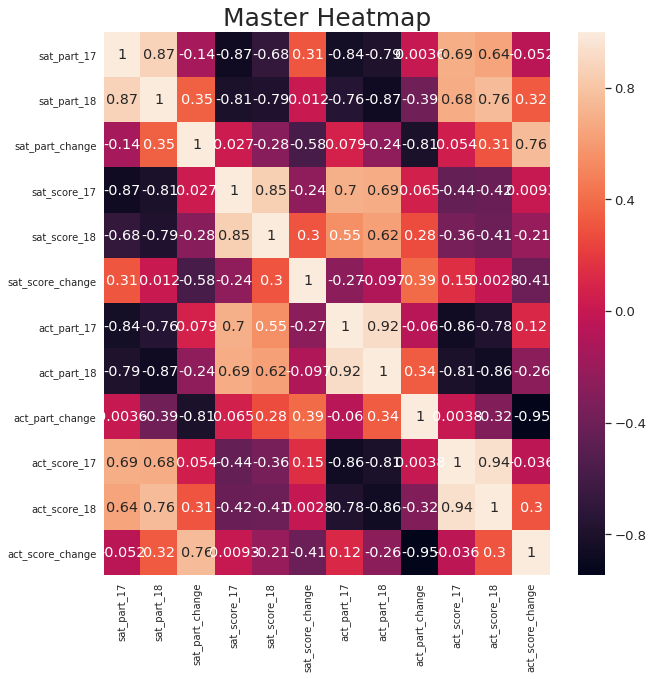

In [43]:
# Here's where using the big dataframe feels useful!

# Fun with formatting (I'm glad I Googled around until finding the sns.set(font_scale) trick)!
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
sns.set(font_scale=1.2)

plt.title('Master Heatmap',fontdict={'fontsize':25})

sns.heatmap(big_data.corr(),annot=True);


In [44]:
# For further data visualization
def subplot_histograms(dataframe, list_of_columns,list_of_titles,list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(10,5*nrows)) # You'll want to specify your figsize
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel("Number of States")
        ax[i].set_xlim([0, 1.0])
        ax[i].set_ylim([0, 25])
    fig.tight_layout()


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT


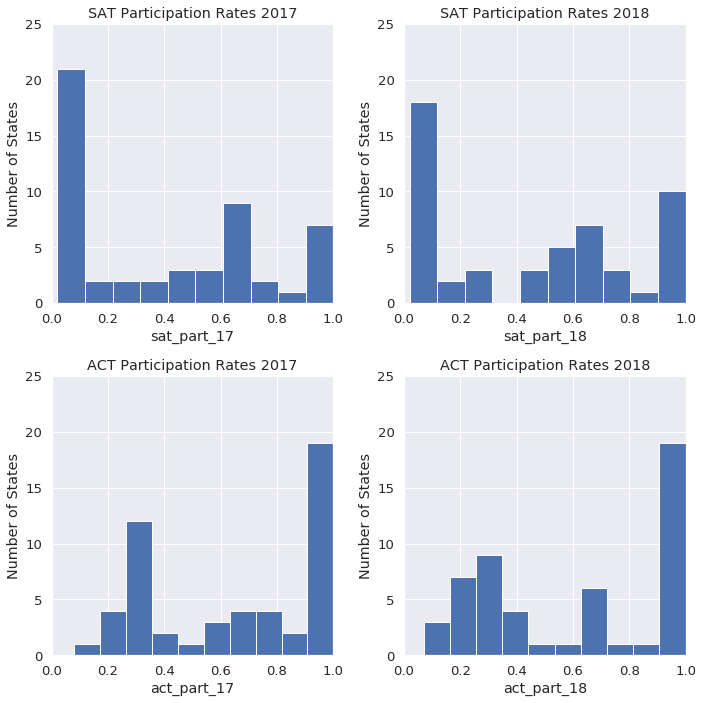

In [45]:
# Participation rates for SAT & ACT
subplot_histograms(big_data,['sat_part_17','sat_part_18','act_part_17','act_part_18'],
                  ['SAT Participation Rates 2017','SAT Participation Rates 2018',
                   'ACT Participation Rates 2017','ACT Participation Rates 2018'],
                  ['sat_part_17','sat_part_18','act_part_17','act_part_18'])

*It seems that the more states are in the leftmost or rightmost bins for a given test, the more are in the opposite bin for the other test that year*

### Plots to look for any further patterns:

Text(0.5, 1.0, 'SAT vs ACT Scores 2017')

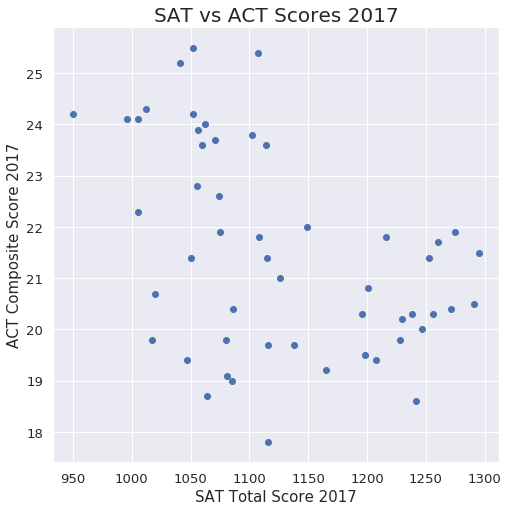

In [46]:
# SAT vs. ACT total/composite scores for 2017
plt.figure(figsize=(8,8))
plt.scatter(big_data["sat_score_17"],big_data["act_score_17"])

plt.xlabel("SAT Total Score 2017",fontdict={'fontsize':15})
plt.ylabel("ACT Composite Score 2017",fontdict={'fontsize':15})
plt.title('SAT vs ACT Scores 2017',fontdict={'fontsize':20})

Text(0.5, 1.0, 'SAT Total Scores: 2017 vs 2018')

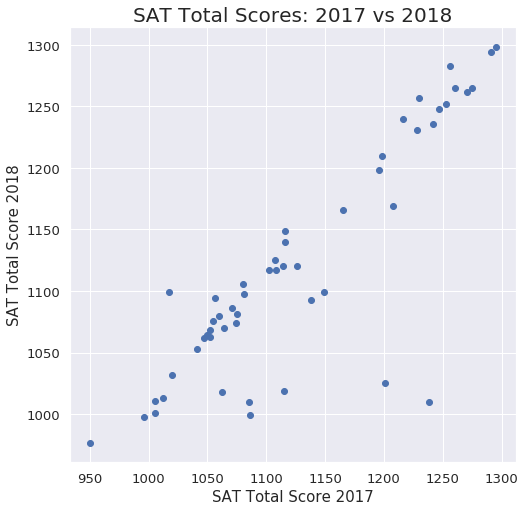

In [47]:
# Total scores for SAT 2017 vs. 2018

plt.figure(figsize=(8,8))
plt.scatter(big_data["sat_score_17"],big_data["sat_score_18"])

plt.xlabel("SAT Total Score 2017",fontdict={'fontsize':15})
plt.ylabel("SAT Total Score 2018",fontdict={'fontsize':15})
plt.title('SAT Total Scores: 2017 vs 2018',fontdict={'fontsize':20})

Text(0.5, 1.0, 'ACT Composite Scores: 2017 vs 2018')

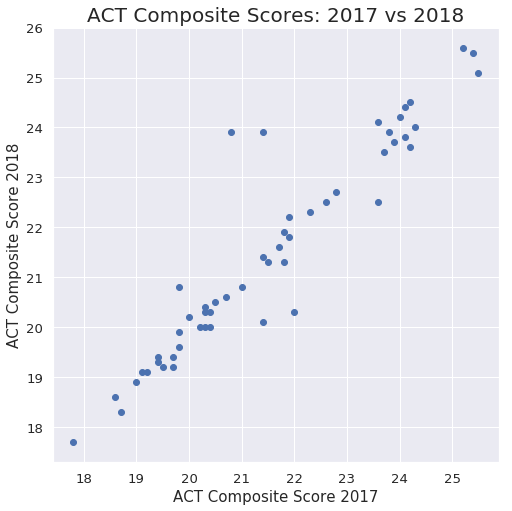

In [48]:
# Composite scores for ACT 2017 vs. 2018

plt.figure(figsize=(8,8))
plt.scatter(big_data["act_score_17"],big_data["act_score_18"])

plt.xlabel("ACT Composite Score 2017",fontdict={'fontsize':15})
plt.ylabel("ACT Composite Score 2018",fontdict={'fontsize':15})
plt.title('ACT Composite Scores: 2017 vs 2018',fontdict={'fontsize':20})

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

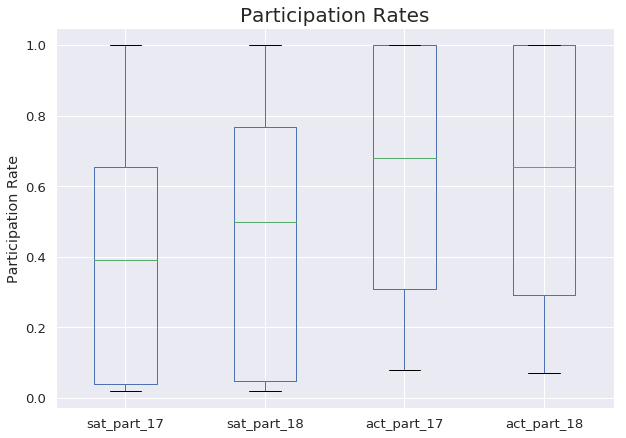

In [49]:
# similar scale:
# - participation rates - both tests, both years
# - SAT Total Score - both years
# - ACT Composite Score - both years

# participation rates - both tests, both years
plt.figure(figsize=(10,7))

plt.title('Participation Rates',fontdict={'fontsize':20})
plt.ylabel('Participation Rate')

big_data.boxplot(column=['sat_part_17','sat_part_18','act_part_17','act_part_18'])


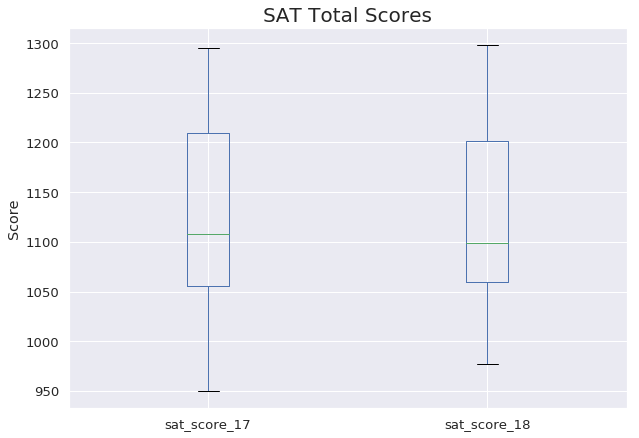

In [50]:
# SAT Total Score - both years

plt.figure(figsize=(10,7))

plt.title('SAT Total Scores',fontdict={'fontsize':20})
plt.ylabel('Score')

big_data.boxplot(column=['sat_score_17','sat_score_18'])


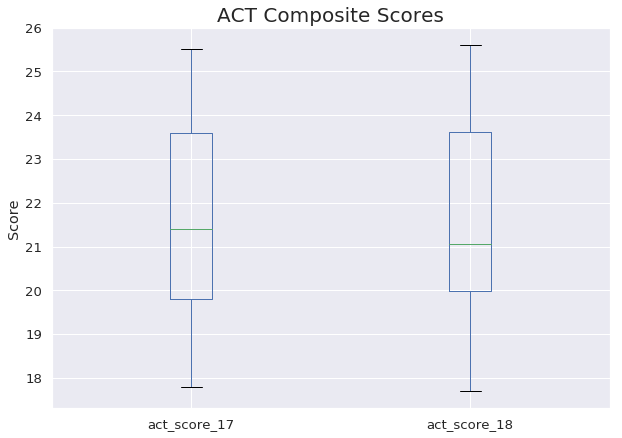

In [51]:
# ACT Composite Score - both years

plt.figure(figsize=(10,7))

plt.title('ACT Composite Scores',fontdict={'fontsize':20})
plt.ylabel('Score')

big_data.boxplot(column=['act_score_17','act_score_18'])


*I'll admit there are ways to make those prettier, but as the instructions themselves said, this is all kind of irrelevant by this point*

### My Unique Approach Plot:

I made this for the purposes of my in-class presentation. I'm not really happy with it in retrospect, but am leaving it in for history's sake. The double bar chart included below is more along the lines of how I would represent this data today.

''

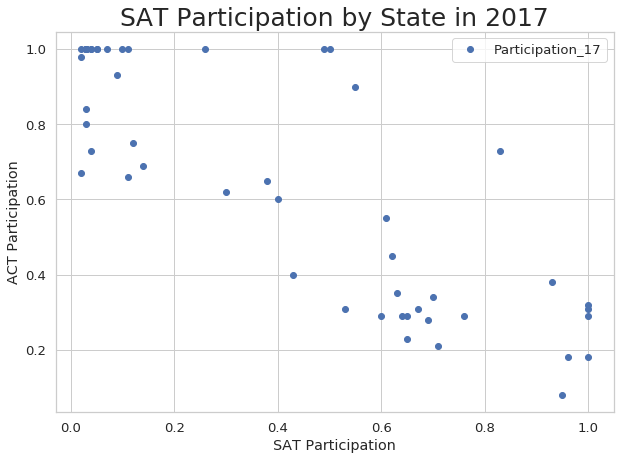

In [70]:
# 1) Graph the sat_17 Participation and Total Score data
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

plt.title('SAT Participation by State in 2017',fontdict={'fontsize':25})
plt.xlabel('SAT Participation')
plt.ylabel('ACT Participation')
ax1.plot(sat_data['Participation_17'],act_data['Participation_17'],alpha=1,linestyle='none',marker='o',color='b')
ax1.legend()
;

''

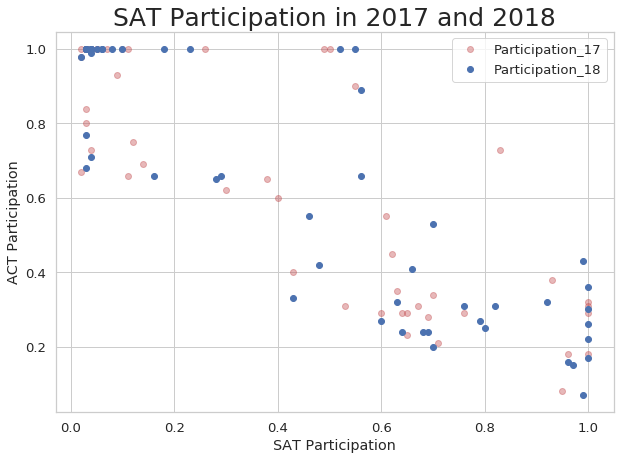

In [71]:
# 2) Layer the 2018 data
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

plt.title('SAT Participation in 2017 and 2018',fontdict={'fontsize':25})
plt.xlabel('SAT Participation')
plt.ylabel('ACT Participation')
ax1.plot(sat_data['Participation_17'],act_data['Participation_17'],alpha=.4,linestyle='none',marker='o',color='r')
ax1.plot(sat_data['Participation_18'],act_data['Participation_18'],alpha=1,linestyle='none',marker='o',color='b')
ax1.legend()
;

''

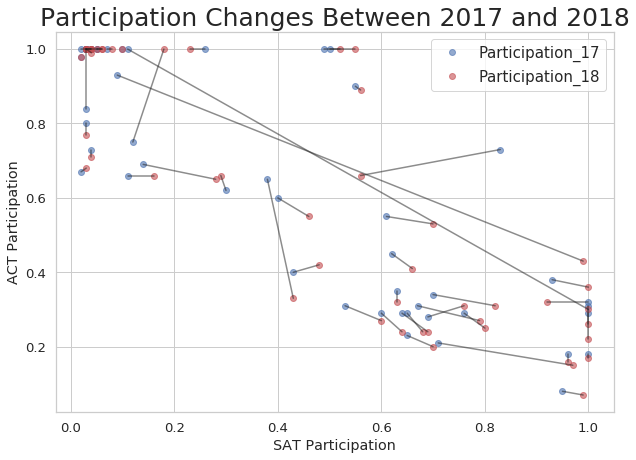

In [74]:
# Let's try drawing in those lines! Last time I tried this it caused no small amount of headache...

sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

plt.title('Participation Changes Between 2017 and 2018',fontdict={'fontsize':25})
plt.xlabel('SAT Participation')
plt.ylabel('ACT Participation')
ax1.plot(sat_data['Participation_17'],act_data['Participation_17'],alpha=.6,linestyle='none',marker='o',color='b')
ax1.plot(sat_data['Participation_18'],act_data['Participation_18'],alpha=.6,linestyle='none',marker='o',color='r')

for state in sat_data['State']:
    ax1.plot(
        [float(sat_data['Participation_17'].loc[sat_data['State']==state]),
          float(sat_data['Participation_18'].loc[sat_data['State']==state])],
         [float(act_data['Participation_17'].loc[act_data['State']==state]),
          float(act_data['Participation_18'].loc[act_data['State']==state])],
        color = 'k',alpha=.5
        )


ax1.legend(fontsize=15)
;

''

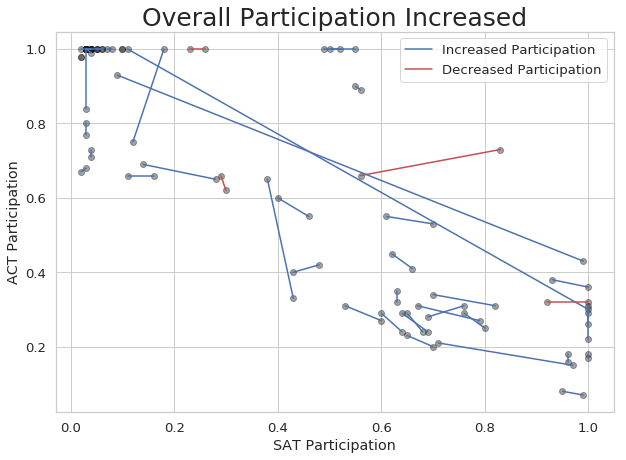

In [73]:
# Lastly, let's look at those sweet colors!

sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

plt.title('Overall Participation Increased',fontdict={'fontsize':25})
plt.xlabel('SAT Participation')
plt.ylabel('ACT Participation')
ax1.plot(sat_data['Participation_17'],act_data['Participation_17'],alpha=.4,linestyle='none',marker='o',color='k')
ax1.plot(sat_data['Participation_18'],act_data['Participation_18'],alpha=.4,linestyle='none',marker='o',color='k')

for state in sat_data['State']:
    if float(sat_data['Participation_Change'].loc[sat_data['State']==state]) >= 0:
        change_col = 'b'
    else:
        change_col = 'r'
    ax1.plot(
        [float(sat_data['Participation_17'].loc[sat_data['State']==state]),
          float(sat_data['Participation_18'].loc[sat_data['State']==state])],
         [float(act_data['Participation_17'].loc[act_data['State']==state]),
          float(act_data['Participation_18'].loc[act_data['State']==state])],
        color = change_col
        )

legend_lines = [Line2D([0], [0], color='b'),
                Line2D([0], [0], color='r')]
ax1.legend(legend_lines, ['Increased Participation', 'Decreased Participation'])
;

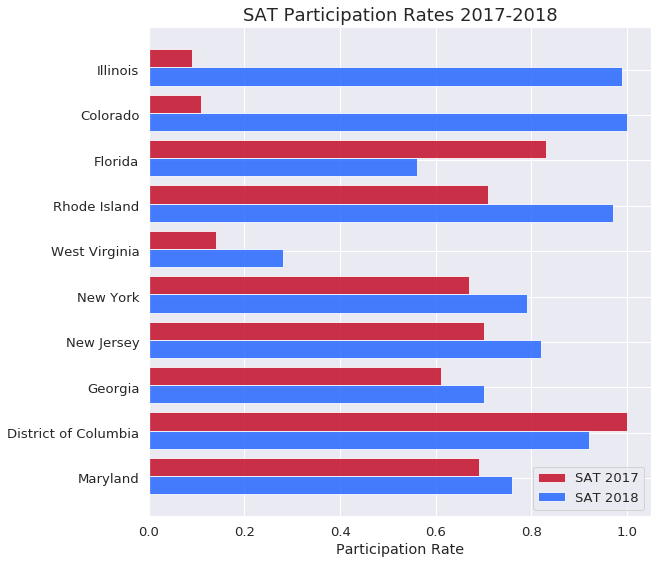

In [56]:
# A later addition, here I want to just make a nice, simple, double bar graph of SAT
# participation rates
plt.figure(figsize=(9,9))

plt.barh(y=sorted_sat.index,width=sorted_sat.Participation_17,height=.4,
         color='#C2001E',alpha=.8);
plt.barh(y=sorted_sat.index - .4,width=sorted_sat.Participation_18,height=.4,
         color='#1A5EFF',alpha=.8);

plt.title('SAT Participation Rates 2017-2018',fontdict={'fontsize':18});
plt.xlabel('Participation Rate');
plt.legend(['SAT 2017','SAT 2018']);
plt.yticks(ticks=sorted_sat.index-.25,labels=sorted_sat.State);

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Further analysis of data trends.

In [58]:
big_data['sat_part_17'].describe()

count    52.000000
mean      0.398077
std       0.349291
min       0.020000
25%       0.040000
50%       0.390000
75%       0.655000
max       1.000000
Name: sat_part_17, dtype: float64

Participation, as is backed up by our plots, has a lot of states with rates close to zero and close to or at 100%. The large std and very small 25% back this up. The 75% quartile isn't as impressive, showing that fewer states have very high participation rates than those with very low rates.

In [59]:
big_data['sat_part_18'].describe()

count    52.000000
mean      0.457500
std       0.369466
min       0.020000
25%       0.047500
50%       0.500000
75%       0.767500
max       1.000000
Name: sat_part_18, dtype: float64

2018 participation looked better for the SAT. The mean participation rate went up by nearly 6%, and the 75% quartile went up %11. Thanks, Illinois and Colorado!

In [60]:
big_data['act_part_17'].describe()

count    52.000000
mean      0.651538
std       0.318325
min       0.080000
25%       0.310000
50%       0.680000
75%       1.000000
max       1.000000
Name: act_part_17, dtype: float64

The ACT had overall better participation rates than the SAT, with a mean about 26% higher and at least 25% of states taking the test with 100% participation.

In [61]:
big_data['act_part_18'].describe()

count    52.000000
mean      0.615000
std       0.337549
min       0.070000
25%       0.292500
50%       0.655000
75%       1.000000
max       1.000000
Name: act_part_18, dtype: float64

And as expected, 2018 saw a bit of a decline. It was pretty small, with mean participation only dropping by about 3% and its 75% quartile remaining at 100%.

In [62]:
big_data['sat_score_17'].describe()

count      52.000000
mean     1126.096154
std        91.583512
min       950.000000
25%      1055.750000
50%      1107.500000
75%      1210.000000
max      1295.000000
Name: sat_score_17, dtype: float64

In [63]:
big_data['sat_score_18'].describe()

count      52.000000
mean     1120.019231
std        93.227424
min       977.000000
25%      1059.750000
50%      1098.500000
75%      1201.000000
max      1298.000000
Name: sat_score_18, dtype: float64

It looks like SAT average scores dropped by a little bit between the two years. This makes sense with the strong negative correlation between participation and scores observed in our heatmap above.

In [64]:
big_data['act_score_17'].describe()

count    52.000000
mean     21.509615
std       2.002083
min      17.800000
25%      19.800000
50%      21.400000
75%      23.600000
max      25.500000
Name: act_score_17, dtype: float64

In [65]:
big_data['act_score_18'].describe()

count    52.000000
mean     21.484615
std       2.099055
min      17.700000
25%      19.975000
50%      21.050000
75%      23.625000
max      25.600000
Name: act_score_18, dtype: float64

The ACT scores differ from the SAT scores. Firstly, their slight decline in participation did NOT come with comensurately higher scores overall. Secondly, it seems like their 25%, 50%, and 75% quartiles are in a smaller range than the SAT's, indicating a test weighted more towards average scores than one with a wider variance.

Actually, coupled with the somewhat higher participation rates, the average scores could also just be an example of the Central Limit Theorem at work!

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Yes, it makes sense to compare these two data for a few reasons. They are measuring the same exact thing for each test, have the exact same range of possible values, and affect each other with their strong negative correlation.

Were we to expand upon the data analysis, however, it *would* be helpful to look at absolute student populations as well. Maybe one test or the other is targeting states with high populations. Maybe the gains or losses in participation rates across states don't accurately represent changes in total tests taken nation-wide. And were we getting even more ambitious, scaling up to observe county- or school-district-level data could provide other insights as well.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

I already kind of answered this one! I don't think looking at specific subject scores across tests is very useful. Comparing one test's scores over time could provide insight, but the scores students get on the ACT vs the SAT won't have a material impact on the decisions of either testing agency without undercutting their integrity severely: "Come on down and take the SAT! Our Math section is easier than that pesky ACT!"

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [66]:
# okay, let's start with the sat__part_17 and act_part_17:

result = stats.ttest_ind(big_data['sat_part_17'], big_data['act_part_17'])
result.statistic, result.pvalue

(-3.8675447839971957, 0.00019379241514419536)

With a P value that low, how could we NOT compare those? Now how about 2018? And the same tests across the two years?

In [67]:
result = stats.ttest_ind(big_data['sat_part_18'], big_data['act_part_18'])
result.statistic, result.pvalue

(-2.2694801426469464, 0.02534366309767802)

Also looks good!

In [68]:
result = stats.ttest_ind(big_data['sat_part_17'], big_data['sat_part_18'])
result.statistic, result.pvalue

(-0.8427884662261657, 0.40131869395462816)

In [69]:
result = stats.ttest_ind(big_data['act_part_17'], big_data['act_part_18'])
result.statistic, result.pvalue

(0.5678845283855121, 0.5713613259958572)

Here we can't statistically reject our null hypothesis for either test's participation across the two years. Statistically, the changes look pretty random, and I can see how that can be the case. After all, our biggest changes in states' participation rates likely stem from politics, which rarely appears as anything BUT random.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

[Colorado](https://www.cde.state.co.us/assessment/coloradosat) - SAT won a newly-implemented competitive bid for the state's standardized testing.

[Illinois](https://www.chicagotribune.com/news/local/breaking/ct-iillinois-act-exam-met-20170414-story.html) - When the (15 year, I think I saw somewhere?) ACT contract was up, they switched to the [redesigned](https://www.applerouth.com/blog/2017/09/13/act-loses-ground-to-redesigned-sat/) SAT because it's in line with state education curriculum and because the [PSATs 8,9, and 10](https://www.isbe.net/Documents/Letter-High-School-Growth-20180618.pdf) all allow the state to track classes' progress over a few years. The state's participation didn't quite reach 100% because some school districts are individually paying to let their students keep taking the ACT during a transitionary period.

Florida - I wanted to look at Florida because it had the third-most drastic change, and the biggest loss in participation between 2017 and 2018. So far I can't find any solid cause-and-effect articles, and the [Department of Education](http://www.fldoe.org/accountability/accountability-reporting/act-sat-ap-data/) hasn't updated its site in a couple of years now. It seems that while the SAT and ACT (which both had loss in participation) are useful for applying to college, the state administers [its own tests](http://www.fldoe.org/accountability/assessments/) to monitor its students' academic success, although a [proposal](http://www.fldoe.org/core/fileparse.php/5663/urlt/FeasIBILITYactsat.pdf) to consider using a national test has been put in this year.

## Conclusions and Recommendations

The biggest swing by far in SAT's favor were the win of new contracts in Colorado and Illinois. If the College Board can make progress towards contracts in other states, they can take even larger market shares. Looking at Florida as an example, the feasability study indicated that the SAT would be a suitable replacement to Florida's own standardized test with a smaller amount of supplementary material than the ACT.

Of course I've seen several sources bemoaning Florida's academic averages in general, so perhaps a push to get states like Florida to adhere to more nationally-acceptable curricula would be a tactic they could take.

As far as additional data, it seems that every state has different amounts of information available on different timelines... I had to focus the scope of my investigations because I just hit too many dead ends and data gaps. Were this a longer-term project with some money behind it, I'd be making phone calls and sending e-mails, but for now keeping a modest goal will suffice. As a final side note, I also think education in general should have more federal oversight and equitable funding distribution nation-wide, but I don't have the expertise or energy to figure out how that could be accomplished.